In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import numpy as np
import pandas as pd
import shutil
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

In [17]:
train_path = 'F:/downloads/KOA/train/'
val_path = 'F:/downloads/KOA/val/'
test_path = 'F:/downloads/KOA/test/'

In [18]:
def createMetaData(path):
    grades = ['0/','1/','2/','3/','4/']
    finalData = []
    finalLabels = []
    for i in range(len(grades)):
        dir_join = path+grades[i]
        for file in os.listdir(dir_join):
            finalData.append(dir_join+file)
          #for three classes
            if (i==0):
              finalLabels.append(0)
            elif (i==1 or i==2):
              finalLabels.append(1)
            else:
              finalLabels.append(2)
            #finalLabels.append(i)
    dat = {'path':finalData,'label':finalLabels}
    return pd.DataFrame.from_dict(dat)

In [19]:
train_data = createMetaData(train_path)
train_data.head()

,path,label
0,F:/downloads/KOA/train/0/9001695L.png,0
1,F:/downloads/KOA/train/0/9001897L.png,0
2,F:/downloads/KOA/train/0/9003126L.png,0
3,F:/downloads/KOA/train/0/9003126R.png,0
4,F:/downloads/KOA/train/0/9003430L.png,0


In [20]:
val_data = createMetaData(val_path)
val_data.head()

,path,label
0,F:/downloads/KOA/val/0/9006140L.png,0
1,F:/downloads/KOA/val/0/9006140R.png,0
2,F:/downloads/KOA/val/0/9009067L.png,0
3,F:/downloads/KOA/val/0/9009067R.png,0
4,F:/downloads/KOA/val/0/9015402L.png,0


In [21]:
test_data = createMetaData(test_path)
test_data.head()

,path,label
0,F:/downloads/KOA/test/0/9003175L.png,0
1,F:/downloads/KOA/test/0/9003175R.png,0
2,F:/downloads/KOA/test/0/9003316L.png,0
3,F:/downloads/KOA/test/0/9003815L.png,0
4,F:/downloads/KOA/test/0/9003815R.png,0


In [22]:
train_data.count()

path     5778
label    5778
dtype: int64

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5778 entries, 0 to 5777
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    5778 non-null   object
 1   label   5778 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.4+ KB


In [24]:
train_data.shape

(5778, 2)

In [25]:
val_data.count()

path     826
label    826
dtype: int64

In [26]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    826 non-null    object
 1   label   826 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [27]:
val_data.shape

(826, 2)

In [28]:
test_data.count()

path     1656
label    1656
dtype: int64

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    1656 non-null   object
 1   label   1656 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.0+ KB


In [30]:
test_data.shape

(1656, 2)

In [31]:
df = pd.DataFrame()
df['ostheoarthritis grading'] = ['Healthy', 'Non Severe OA', 'Severe OA']#['Grade 0','Grade 1','Grade 2','Grade 3','Grade 4']
grade_count = []
for i in range(3):
    gc = len(train_data[train_data['label']==i]) + len(test_data[test_data['label']==i]) + len(val_data[val_data['label']==i])
    grade_count.append(gc)
df['count (training, validation and testing)'] = grade_count[:]
df

,ostheoarthritis grading,"count (training, validation and testing)"
0,Healthy,3253
1,Non Severe OA,3670
2,Severe OA,1337


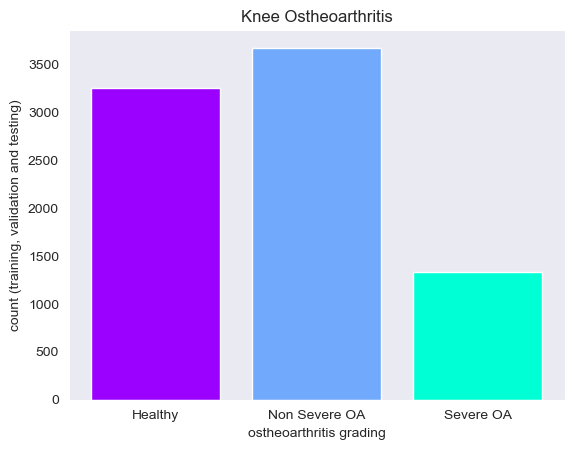

In [32]:
x = list(np.arange(3))
y = list(df['count (training, validation and testing)'])
plt.bar(x,y,color=['#9a01ff','#71a9fc','#01ffd5'])#,'#5cfe9d','#b7ff01'])
plt.grid()
plt.xticks(x,list(df['ostheoarthritis grading']))
plt.xlabel('ostheoarthritis grading')
plt.ylabel('count (training, validation and testing)')
plt.title('Knee Ostheoarthritis')
plt.show()

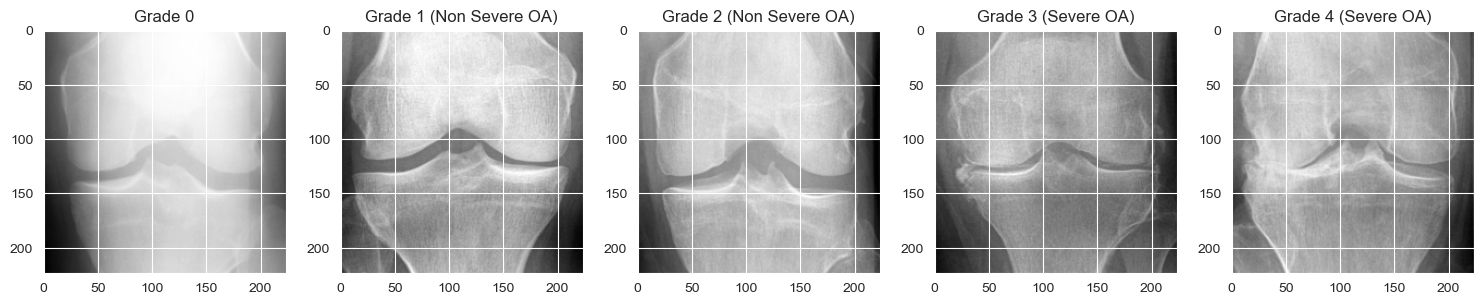

In [33]:
fig, ax = plt.subplots(1,5,figsize=(15,15))
ax = ax.ravel()
plt.tight_layout()
ax = ax.ravel()
plt.tight_layout()
ldata = ['F:/downloads/KOA/train/0/9005656L.png',
         'F:/downloads/KOA/train/1/9008561R.png',
        'F:/downloads/KOA/train/2/9024940L.png',
        'F:/downloads/KOA/train/3/9037823L.png',
        'F:/downloads/KOA/train/4/9204055R.png']
lab = ['Grade 0','Grade 1 (Non Severe OA)','Grade 2 (Non Severe OA)','Grade 3 (Severe OA)','Grade 4 (Severe OA)']
for i in range(0,5):
    ax[i].imshow(plt.imread(ldata[i]), cmap='gray')
    ax[i].set_title(lab[i])
plt.show()

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [35]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

In [36]:
def filtering(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(img)
  cl1 = cv2.cvtColor(cl1,cv2.COLOR_GRAY2RGB)
  return cl1

In [37]:
class KneeDataset(Dataset):
    def __init__(self,data,transforms=None):
        self.data = data
        self.transforms = transforms
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        img_name = str(self.data.iloc[idx,0])
        image = cv2.imread(img_name)
        image = filtering(image)
        image = Image.fromarray(image)
        #image = image.resize((256, 256,3))
        label = torch.tensor(int(self.data.iloc[idx,1]))
        if self.transforms:
            image = self.transforms(image)
        return (image,label)

In [38]:
def allDevice():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    return device

In [39]:
import torchvision
device = allDevice()
model = torchvision.models.vgg13_bn(pretrained=True)
print(model)

d:\anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [40]:
train_set = KneeDataset(data=train_data, transforms=transform)
val_set = KneeDataset(data=val_data, transforms=transform)
test_set = KneeDataset(data=test_data, transforms=transform)

In [41]:
batch_size= 64
train_dl = DataLoader(train_set,batch_size=batch_size,shuffle=True)
val_dl = DataLoader(val_set,batch_size=batch_size,shuffle=True)
test_dl = DataLoader(test_set,batch_size=batch_size)

In [42]:
for x in model.features.parameters():
  x.requires_grad = False

In [43]:
model.classifier= nn.Sequential(nn.Linear(in_features=25088, out_features=4096, bias=True),
                                nn.ReLU(inplace=True),
                                nn.Dropout(p=0.5, inplace=False),
                                nn.Linear(in_features=4096, out_features=4096, bias=True),
                                nn.ReLU(inplace=True),
                                nn.Dropout(p=0.5, inplace=False),
                                nn.Linear(in_features=4096, out_features=3, bias=True))

In [44]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [45]:
import torch.optim as optim
from torch.optim import lr_scheduler
optimizer= optim.Adam(model.parameters(),lr = 1e-4)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,mode='max',patience=5,verbose=True)
loss_fn = nn.CrossEntropyLoss()

d:\anaconda\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [46]:
import copy
def trainEpoch(model,dataloader,lr,optimizer,loss_fn):
    total_loss,total_acc,count = 0.0,0.0,0
    model.train()
    for x,y in dataloader:
        #print(type(x))
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        _, preds = torch.max(outputs , 1)
        loss = loss_fn(outputs,y)
        loss.backward()
        optimizer.step()
        total_acc+=(preds==y).sum()
        total_loss+=loss
        count+=len(y)
    return total_loss.item()/count, total_acc.item()/count

In [47]:
def validateEpoch(model,dataloader,loss_fn):
    total_loss,total_acc,count = 0.0,0.0,0
    model.eval()
    with torch.no_grad():
        for x,y in dataloader:
            x = x.to(device)
            y = y.to(device)
            outputs = model(x)
            _, preds = torch.max(outputs , 1)
            loss = loss_fn(outputs,y)
            total_acc+=(preds==y).sum()
            total_loss+=loss
            count+=len(y)
    return total_loss.item()/count, total_acc.item()/count

In [48]:
def train(model,train_dataloader,val_dataloader,lr,optimizer,loss_fn,scheduler,epochs):
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = trainEpoch(model,train_dataloader,lr,optimizer,loss_fn)
        vl,va = validateEpoch(model,val_dataloader,loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
        if va > best_acc:
            best_acc = va
            best_model_wts = copy.deepcopy(model.state_dict())
        scheduler.step(vl)
    return res,best_model_wts

In [51]:
hist1, best_model1 = train(model,train_dl,val_dl,1e-4,optimizer,loss_fn,scheduler,50)

Epoch  0, Train acc=0.822, Val acc=0.614, Train loss=0.007, Val loss=0.013
Epoch  1, Train acc=0.876, Val acc=0.626, Train loss=0.005, Val loss=0.014


KeyboardInterrupt: 

In [65]:
def plot_results(hist):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(hist['train_acc'], label='Training acc')
    plt.plot(hist['val_acc'], label='Validation acc')
    plt.legend()
    plt.subplot(122)
    plt.plot(hist['train_loss'], label='Training loss')
    plt.plot(hist['val_loss'], label='Validation loss')
    plt.legend()

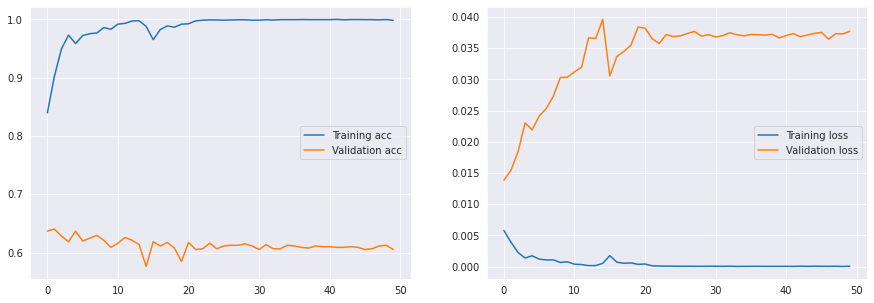

In [70]:
plot_results(hist1)

In [74]:
import tqdm
def testing(model,dataloader):
    y_pred_list = []
    y_true_list = []                     
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_test_pred = model(x_batch)
            _, y_pred_tag = torch.max(y_test_pred, dim = 1)
            y_pred_list.append(y_pred_tag.cpu().numpy())
            y_true_list.append(y_batch.cpu().numpy())
  #print(y_true_list[0])
        y_pred_list = [i[0] for i in y_pred_list]
        y_true_list = [i[0] for i in y_true_list]
    return y_pred_list,y_true_list

In [75]:
train_preds,train_actual = testing(model,train_dl)
test_preds,test_actual = testing(model,test_dl)

In [78]:
print(classification_report(train_preds,train_actual))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        14

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [79]:
print(classification_report(test_preds,test_actual))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.67      0.62      0.64        13
           2       0.50      0.67      0.57         3

    accuracy                           0.65        26
   macro avg       0.62      0.66      0.64        26
weighted avg       0.66      0.65      0.66        26



Text(0.5, 257.44, 'Predicted label')

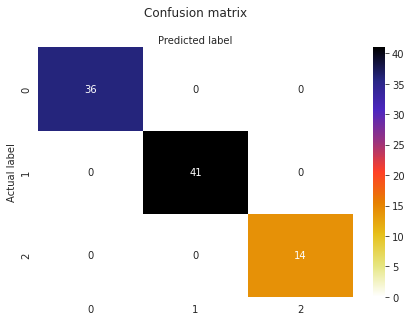

In [80]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(train_preds,train_actual)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cfm),annot=True,cmap='CMRmap_r')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

Text(0.5, 257.44, 'Predicted label')

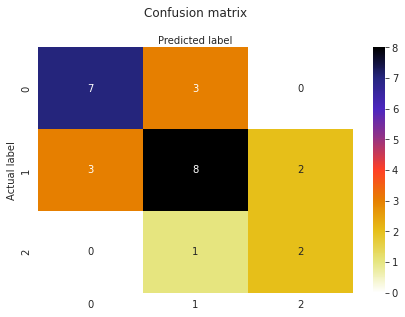

In [82]:
cfm = confusion_matrix(test_preds,test_actual)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cfm),annot=True,cmap='CMRmap_r')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')